In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [12]:
df = pd.read_csv("C:/Users/PREETHAM REDDY/Machine learning/Sentiment-Analysis-of-Movie-review-dataset-master/train.tsv", sep="\t")

In [13]:
df_test = pd.read_csv("C:/Users/PREETHAM REDDY/Machine learning/Sentiment-Analysis-of-Movie-review-dataset-master/test.tsv", sep="\t")

In [14]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [15]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

In [17]:
print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Train set dimensions after applying TF-IDF vectorizer:


(156060, 301627)

In [18]:
X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# split the data into 80:20 for training and validating.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [19]:
ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'KNeighborsClassifier'])

              precision    recall  f1-score   support

           0       0.62      0.16      0.26      1414
           1       0.56      0.33      0.42      5455
           2       0.65      0.91      0.76     15917
           3       0.60      0.43      0.50      6585
           4       0.68      0.21      0.32      1841

   micro avg       0.63      0.63      0.63     31212
   macro avg       0.62      0.41      0.45     31212
weighted avg       0.62      0.63      0.60     31212


accuracy_score 0.631840317826477

Weighted Averaged validation metrics
precision_score 0.6232831390820265
recall_score 0.631840317826477
f1_score 0.5951997402747816


elapsed time in seconds:  28.519789218902588



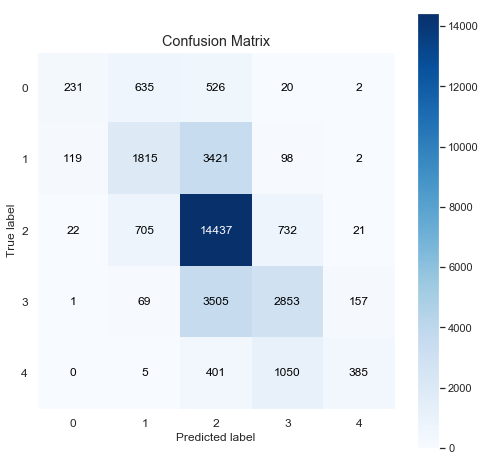

In [20]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of DecisionTreeClassifier, with train-test split:
              precision    recall  f1-score   support

           0       0.31      0.24      0.27      1414
           1       0.41      0.33      0.37      5455
           2       0.65      0.77      0.71     15917
           3       0.42      0.36      0.39      6585
           4       0.34      0.25      0.29      1841

   micro avg       0.55      0.55      0.55     31212
   macro avg       0.43      0.39      0.40     31212
weighted avg       0.53      0.55      0.54     31212


accuracy_score 0.5517749583493529

Weighted Averaged validation metrics
precision_score 0.528135877674154
recall_score 0.5517749583493529
f1_score 0.5358109197623023


elapsed time in seconds:  832.2392272949219



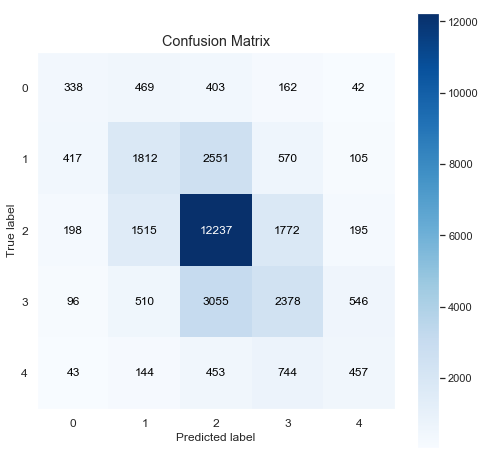

In [21]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
    
print()
print("Evaluation of DecisionTreeClassifier, with train-test split:")

clf_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
clf_DecisionTreeClassifier.fit(xtrain, ytrain)
predictions = clf_DecisionTreeClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of ExtraTreesClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.43      0.37      0.40      1414
           1       0.53      0.45      0.49      5455
           2       0.70      0.82      0.75     15917
           3       0.56      0.44      0.49      6585
           4       0.48      0.36      0.42      1841

   micro avg       0.63      0.63      0.63     31212
   macro avg       0.54      0.49      0.51     31212
weighted avg       0.61      0.63      0.62     31212


accuracy_score 0.6278674868640266

Weighted Averaged validation metrics
precision_score 0.6128795109007072
recall_score 0.6278674868640266
f1_score 0.6155181761347517


elapsed time in seconds:  1679.377589225769



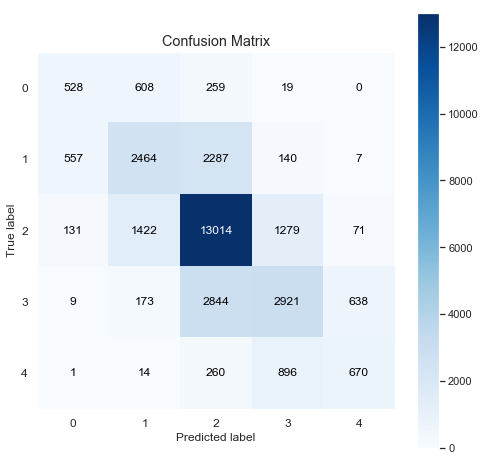

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

start_time = time.time()
    
print()
print("Evaluation of ExtraTreesClassifier with train-test split:")

clf_ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=10, random_state=42)
clf_ExtraTreesClassifier.fit(xtrain, ytrain)
predictions = clf_ExtraTreesClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of RandomForestClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.45      0.34      0.39      1414
           1       0.53      0.40      0.46      5455
           2       0.67      0.85      0.75     15917
           3       0.56      0.39      0.46      6585
           4       0.50      0.32      0.39      1841

   micro avg       0.62      0.62      0.62     31212
   macro avg       0.54      0.46      0.49     31212
weighted avg       0.60      0.62      0.60     31212


accuracy_score 0.6217160066641035

Weighted Averaged validation metrics
precision_score 0.6030226749717309
recall_score 0.6217160066641035
f1_score 0.6006798242227042


elapsed time in seconds:  799.1463260650635



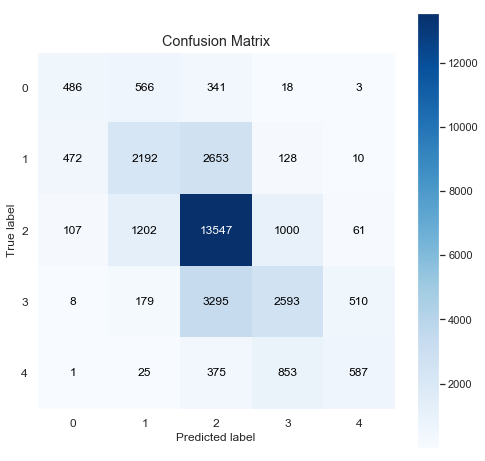

In [23]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
    
print()
print("Evaluation of RandomForestClassifier with train-test split:")

clf_RandomForestClassifier = RandomForestClassifier(n_estimators = 10, random_state=42)
clf_RandomForestClassifier.fit(xtrain, ytrain)
predictions = clf_RandomForestClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of LinearSVC, multi_class='ovr', with train-test split:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1414
           1       0.55      0.50      0.52      5455
           2       0.73      0.82      0.77     15917
           3       0.58      0.52      0.55      6585
           4       0.54      0.41      0.47      1841

   micro avg       0.65      0.65      0.65     31212
   macro avg       0.58      0.52      0.54     31212
weighted avg       0.64      0.65      0.65     31212


accuracy_score 0.6542675893886967

Weighted Averaged validation metrics
precision_score 0.6430068928938866
recall_score 0.6542675893886967
f1_score 0.6457990516414972


elapsed time in seconds:  13.577224731445312



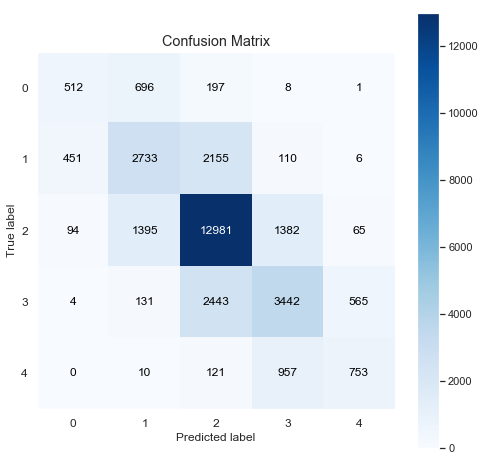

In [24]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print()
print("Evaluation of LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of BernoulliNB with train-test split:
              precision    recall  f1-score   support

           0       0.47      0.17      0.25      1414
           1       0.53      0.36      0.43      5455
           2       0.63      0.87      0.73     15917
           3       0.55      0.36      0.44      6585
           4       0.51      0.20      0.29      1841

   micro avg       0.60      0.60      0.60     31212
   macro avg       0.54      0.39      0.43     31212
weighted avg       0.58      0.60      0.57     31212


accuracy_score 0.6023324362424708

Weighted Averaged validation metrics
precision_score 0.5822905752433739
recall_score 0.6023324362424708
f1_score 0.568561801602859


elapsed time in seconds:  1.1512725353240967



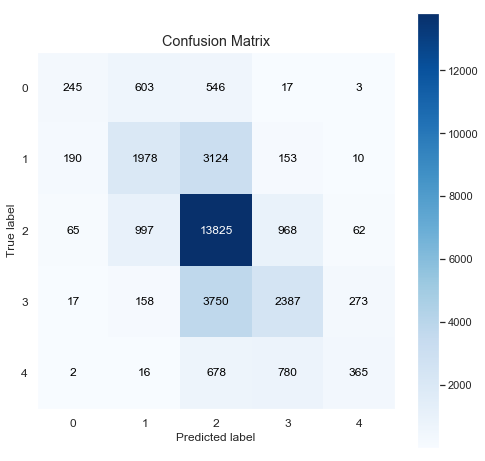

In [25]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
    
print()
print("Evaluation of BernoulliNB with train-test split:")

clf_BernoulliNB = BernoulliNB()
clf_BernoulliNB.fit(xtrain, ytrain)
predictions = clf_BernoulliNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['BernoulliNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['BernoulliNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['BernoulliNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()


Evaluation of MultinomialNB with train-test split:
              precision    recall  f1-score   support

           0       0.76      0.04      0.07      1414
           1       0.57      0.25      0.35      5455
           2       0.61      0.93      0.74     15917
           3       0.59      0.39      0.47      6585
           4       0.76      0.05      0.10      1841

   micro avg       0.61      0.61      0.61     31212
   macro avg       0.66      0.33      0.35     31212
weighted avg       0.62      0.61      0.55     31212


accuracy_score 0.6064654620017942

Weighted Averaged validation metrics
precision_score 0.6150381651913431
recall_score 0.6064654620017942
f1_score 0.5463158424084111


elapsed time in seconds:  0.7418956756591797



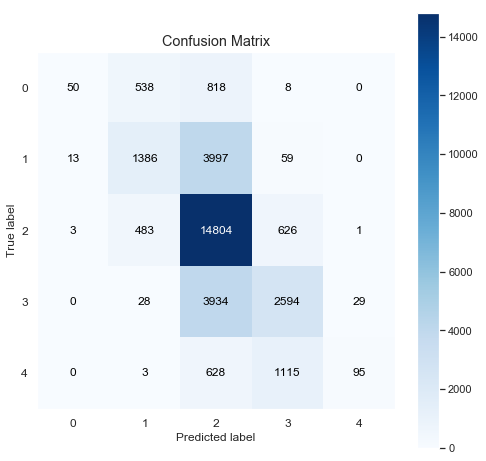

In [26]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
    
print()
print("Evaluation of MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

              precision    recall  f1-score   support

           0       0.37      0.41      0.39      1414
           1       0.46      0.51      0.49      5455
           2       0.70      0.72      0.71     15917
           3       0.53      0.47      0.50      6585
           4       0.49      0.32      0.39      1841

   micro avg       0.60      0.60      0.60     31212
   macro avg       0.51      0.49      0.49     31212
weighted avg       0.59      0.60      0.59     31212


accuracy_score 0.5956683326925541

Weighted Averaged validation metrics
precision_score 0.5940534151487472
recall_score 0.5956683326925541
f1_score 0.5929853631793345


elapsed time in seconds:  413.7712912559509



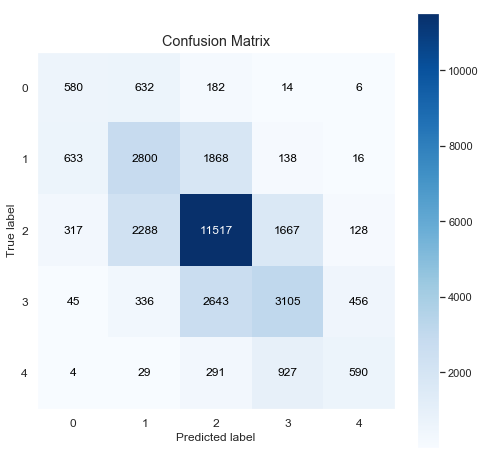

In [27]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

clf_knn = KNeighborsClassifier()
clf_knn.fit(xtrain, ytrain)
predictions = clf_knn.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['KNeighborsClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

In [28]:
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.654268,0.645799,13.3116
LogisticRegression,0.63184,0.63184,28.4573
ExtraTreesClassifier,0.627867,0.615518,1678.96
RandomForestClassifier,0.621716,0.60068,794.653
MultinomialNB,0.606465,0.546316,0.403157
BernoulliNB,0.602332,0.568562,0.844416
KNeighborsClassifier,0.595668,0.592985,341.865
DecisionTreeClassifier,0.551775,0.535811,832.208


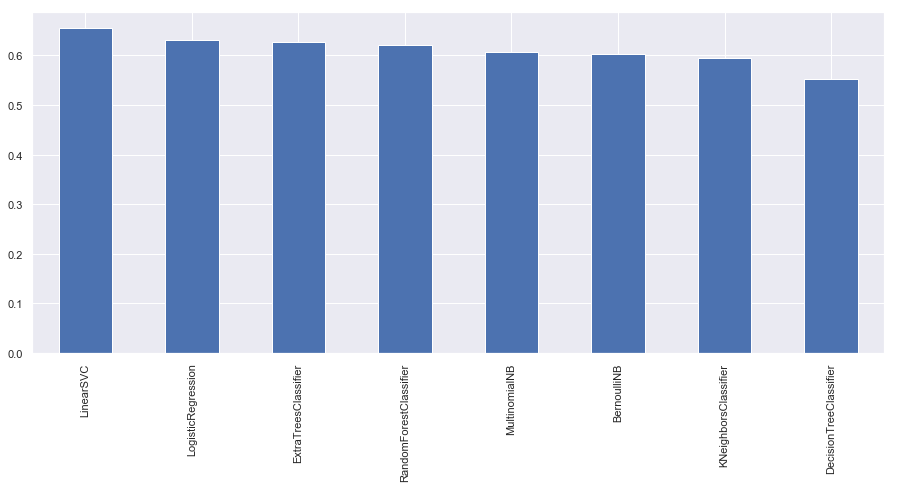

In [29]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

In [30]:
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=True)

,accuracy,F1-score,training-time
DecisionTreeClassifier,0.551775,0.535811,832.208
MultinomialNB,0.606465,0.546316,0.403157
BernoulliNB,0.602332,0.568562,0.844416
KNeighborsClassifier,0.595668,0.592985,341.865
RandomForestClassifier,0.621716,0.60068,794.653
ExtraTreesClassifier,0.627867,0.615518,1678.96
LogisticRegression,0.63184,0.63184,28.4573
LinearSVC,0.654268,0.645799,13.3116


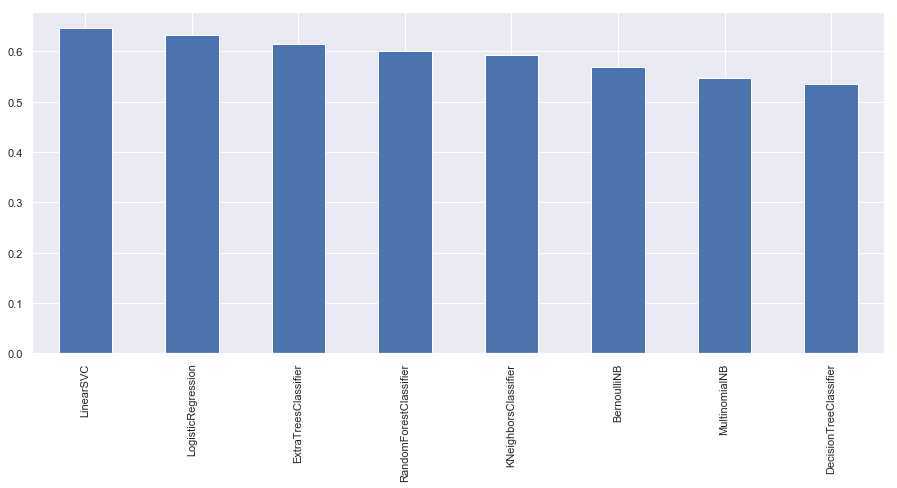

In [31]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=False)["F1-score"].plot(kind="bar")

In [32]:
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)

,accuracy,F1-score,training-time
MultinomialNB,0.606465,0.546316,0.403157
BernoulliNB,0.602332,0.568562,0.844416
LinearSVC,0.654268,0.645799,13.3116
LogisticRegression,0.63184,0.63184,28.4573
KNeighborsClassifier,0.595668,0.592985,341.865
RandomForestClassifier,0.621716,0.60068,794.653
DecisionTreeClassifier,0.551775,0.535811,832.208
ExtraTreesClassifier,0.627867,0.615518,1678.96


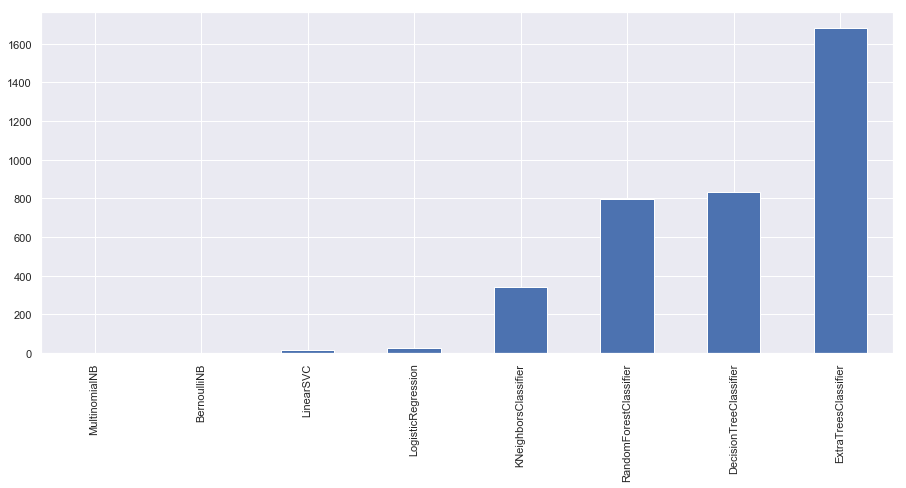

In [33]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)["training-time"].plot(kind="bar")

              precision    recall  f1-score   support

           0       0.48      0.39      0.43      1414
           1       0.55      0.48      0.51      5455
           2       0.69      0.86      0.77     15917
           3       0.60      0.43      0.50      6585
           4       0.58      0.29      0.39      1841

   micro avg       0.65      0.65      0.65     31212
   macro avg       0.58      0.49      0.52     31212
weighted avg       0.63      0.65      0.63     31212


accuracy_score 0.6460976547481738

Weighted Averaged validation metrics
precision_score 0.6324936572926767
recall_score 0.6460976547481738
f1_score 0.62821923478184



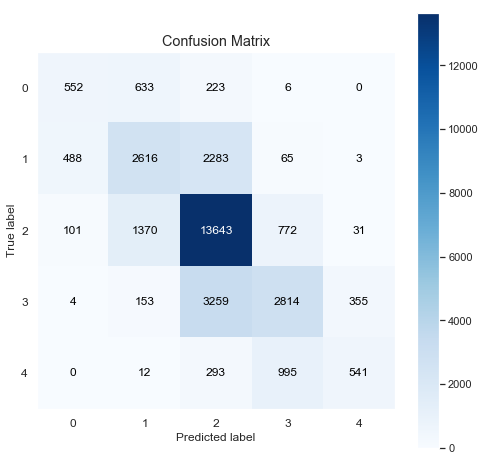

In [34]:
predictions_linear_svc = clf_LinearSVC.predict(xvalid)
predictions_extra_trees = clf_ExtraTreesClassifier.predict(xvalid)
predictions_logistic_regression = clf_logistic_regression.predict(xvalid)
predictions_random_forest = clf_RandomForestClassifier.predict(xvalid)

ensemble_all_ml_default_pred_df = pd.DataFrame({
    'linear_svc':predictions_linear_svc,
    'logistic_regression':predictions_logistic_regression,
    'extra_trees':predictions_extra_trees,
    'random_forest':predictions_random_forest})


# ensemble classes' predictions over the validation set
pred_mode = ensemble_all_ml_default_pred_df.agg('mode',axis=1)[0].values

print(classification_report(yvalid, pred_mode))

print()
print("accuracy_score", accuracy_score(yvalid, pred_mode))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, pred_mode, average='weighted'))
print("recall_score", recall_score(yvalid, pred_mode, average='weighted'))
print("f1_score", f1_score(yvalid, pred_mode, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, pred_mode)